In [36]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

In [116]:
#Extracting stock data into a dataframe
#Note: solution is scalable for more than two tickers!
df = yf.download(['AAPL','CAT'],start="2016-01-01",end="2021-07-10")

[*********************100%***********************]  2 of 2 completed


In [117]:
#Normalizing the data and calculating returns based on adjusted close prices
df = np.log(1+df['Adj Close'].pct_change())

In [132]:
#Calculating Portfolio reuturn using simple solution, weights*average return
weights = [0.5,0.5]
Preturn = weights[0]*df.AAPL.mean() + weights[1]*df.CAT.mean()

In [126]:
#Building scalable solution using dot product via a function
def portfolioreturn(weights):
    return np.dot(df.mean(),weights)

In [127]:
#Calcultaing Portfolio Variance using simple solution
pv = weights[0]**2*df.cov().iloc[0,0]+weights[1]**2*df.cov().iloc[1,1]+2*weights[0]*weights[1]*df.cov().iloc[0,1]
std = pv**(1/2)**np.sqrt(250)

In [128]:
#CHECK ALGEBRA ON PAPER!!; building scalable solution
#Annualize Standard deviations with np.sqrt(250), 250 trading days
def portfoliostd(weights):
    return ((np.dot(np.dot(df.cov(),weights),weights))**(1/2)*np.sqrt(250))

In [129]:
#creating random weight generator
#solution scalable by measuring number of columns in original dataframe
#rand /= rand/sum() ensures that the weights add up to one
def weightcreator(df):
    rand = np.random.random(len(df.columns))
    rand /= rand.sum()
    return rand

In [130]:
#creating empty lists to store different returns and standard deviations for randomly generated weights
rtrns = []
stds = []
w = []

#iterating 1000 random weights and storing them in empty lists
for i in range(1000):
    weights = weightcreator(df)
    rtrns.append(portfolioreturn(weights))
    stds.append(portfoliostd(weights))
    w.append(weights)

array([0.5313783, 0.4686217])

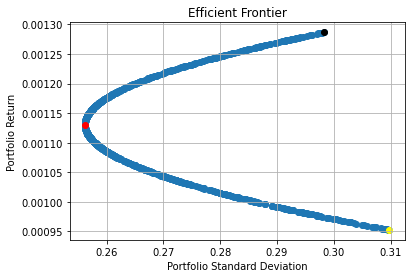

In [131]:
#Plotting Efficient Frontier
plt.scatter(stds,rtrns)
plt.grid()
plt.title("Efficient Frontier")
plt.xlabel("Portfolio Standard Deviation")
plt.ylabel("Portfolio Return")

#Highlighting Apple and Capterpillar only Portfolios
plt.scatter(df.std().iloc[0]*np.sqrt(250),df.mean().iloc[0], c='black')
plt.scatter(df.std().iloc[1]*np.sqrt(250),df.mean().iloc[1], c='yellow')

#Finding minimum variance portfolio on the efficient frontier
plt.scatter(min(stds),rtrns[stds.index(min(stds))], c='red')

#Finding the corresponding weights of the min variance portfolio
w[stds.index(min(stds))]